In [1]:
import assignment.load as load
import assignment.display as display
import matplotlib.pyplot as plt
from matplotlib.cm import gray
%matplotlib inline

In [2]:
data = load.load_data(load.DEFAULT_PATH)

In [3]:
from assignment.classify import WeightedKNearestNeighbour
from assignment.dimensionality import PCAReducer, BorderTrimReducer, BestKSelector, DropFirstSelector
from assignment.pipeline import Pipeline

nn_fuzzy = lambda: WeightedKNearestNeighbour(k=1, fuzzy=True)
nn_not_fuzzy = WeightedKNearestNeighbour(k=1, fuzzy=False)

pipeline1 = Pipeline(nn_fuzzy(), [PCAReducer(72), BestKSelector(10)])
pipeline1.train(data._raw_data['train_data'], data._raw_data['train_labels'])
pipeline2 = Pipeline(nn_fuzzy(), [PCAReducer(11), DropFirstSelector()])
pipeline2.train(data._raw_data['train_data'], data._raw_data['train_labels'])

In [4]:
# raise Exception()

In [5]:
import numpy as np

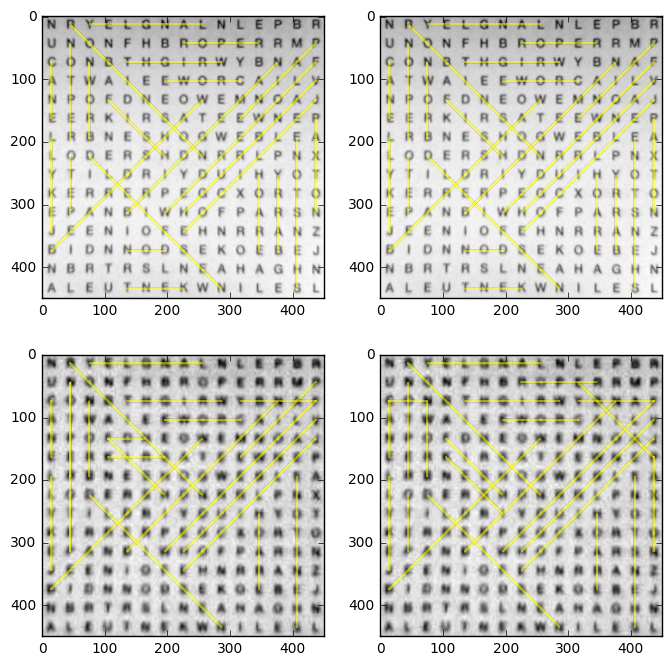

In [6]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
data.wordsearch1.classify(pipeline1)
data.wordsearch1.find_all_and_show(rad=2)

plt.subplot(2, 2, 2)
data.wordsearch1.classify(pipeline2)
data.wordsearch1.find_all_and_show(rad=2)

plt.subplot(2, 2, 3)
data.wordsearch2.classify(pipeline1)
data.wordsearch2.find_all_and_show(rad=2)

plt.subplot(2, 2, 4)
data.wordsearch2.classify(pipeline2)
data.wordsearch2.find_all_and_show(rad=2)

In [7]:
data.wordsearch2.classify(pipeline1)
q = data.wordsearch2.correctness_score(only_score=True)

data.wordsearch2.classify(pipeline2)
p = data.wordsearch2.correctness_score(only_score=True)
(p, q)

(20, 19)

In [8]:
data.wordsearch1.classify(pipeline1)
p = data.wordsearch1.correctness_score(only_score=False)

data.wordsearch1.classify(pipeline2)
q = data.wordsearch1.correctness_score(only_score=False)
(p, q)

((24, {}), (24, {}))

[ 1  6  5  2 10  3  4 11  8 17]


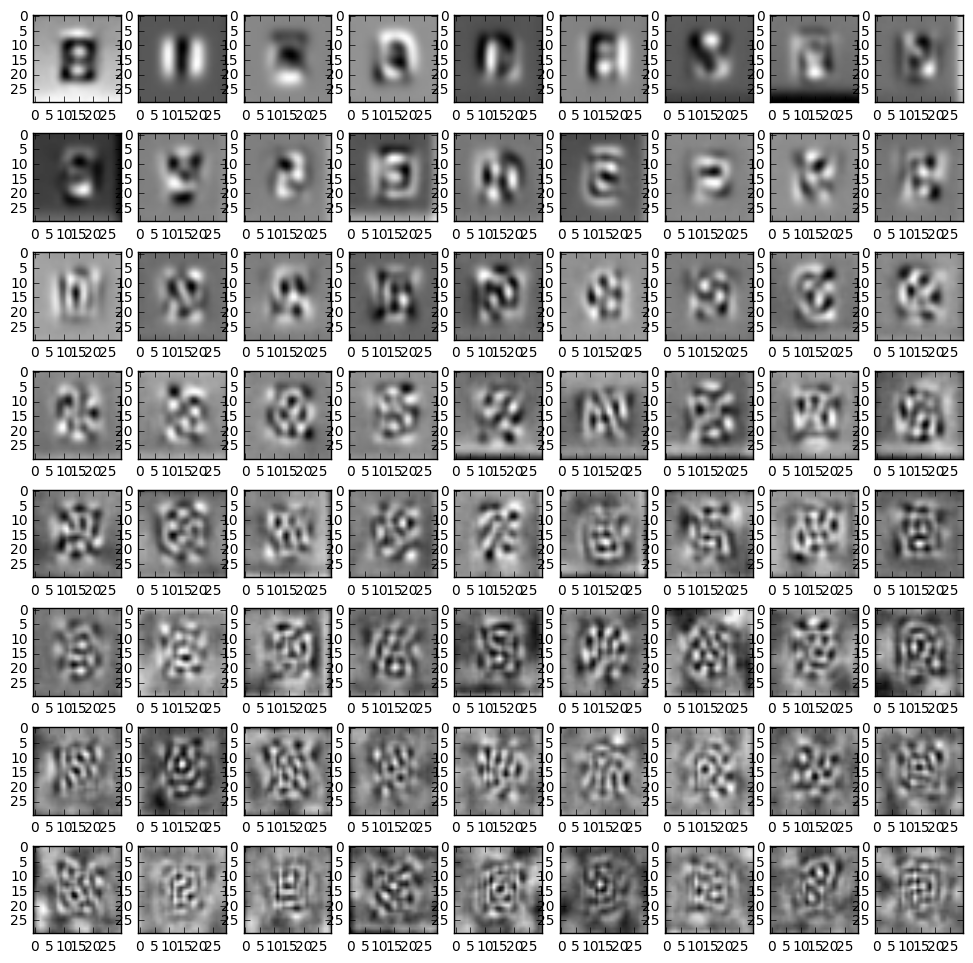

In [9]:
from assignment.data import Letter
from math import sqrt, floor, ceil

plt.figure(figsize=(12, 12))
eigenvectors = pipeline1._reducers[0]._eigenvectors.transpose()

print(pipeline1._reducers[1]._best_k)

height = floor(sqrt(eigenvectors.shape[0]))
width = ceil(eigenvectors.shape[0] / height)
i = 0
for eigenvector in eigenvectors:
    i += 1
    plt.subplot(height, width, i)
    Letter(raw_data=eigenvector).show()

In [14]:
pipeline1._reduce(data._raw_data['train_data'])

array([[-181.53745018,  -46.79180507,  -26.20457712, ...,  -21.2529269 ,
          11.64192958,   10.53757508],
       [  44.20315973,   25.17757345,  146.46605544, ...,  -39.34312252,
          47.2777504 ,  -32.85846   ],
       [-158.70872459,   50.18132828,  -10.79881395, ...,   37.13550835,
         -70.69242589,   21.67667052],
       ..., 
       [-170.81715904,    8.64827049,  -51.75720079, ...,    1.75508548,
          -3.92308004,  -10.37376417],
       [ -97.31684005,  -51.782654  ,  -71.77611141, ...,   22.21246605,
          23.28703516,  -19.8014045 ],
       [ -99.67436297,   -5.01506709,  -68.94844673, ...,   63.91087229,
         -22.09248049,  -34.49133084]])